In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv("./austin_weather.csv")

In [71]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [72]:
df.drop(columns=['Date','Events','SeaLevelPressureLowInches'],axis=1,inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   TempHighF                   1319 non-null   int64 
 1   TempAvgF                    1319 non-null   int64 
 2   TempLowF                    1319 non-null   int64 
 3   DewPointHighF               1319 non-null   object
 4   DewPointAvgF                1319 non-null   object
 5   DewPointLowF                1319 non-null   object
 6   HumidityHighPercent         1319 non-null   object
 7   HumidityAvgPercent          1319 non-null   object
 8   HumidityLowPercent          1319 non-null   object
 9   SeaLevelPressureHighInches  1319 non-null   object
 10  SeaLevelPressureAvgInches   1319 non-null   object
 11  VisibilityHighMiles         1319 non-null   object
 12  VisibilityAvgMiles          1319 non-null   object
 13  VisibilityLowMiles          1319 non-null   obje

In [74]:
df=df.replace('T',0.0)
df=df.replace('-',0.0)

In [75]:
for i in df.columns:
    df[i]=np.float_(df[i])

In [76]:
df.to_csv('final_weather.csv')

In [77]:
x=df.drop(['PrecipitationSumInches'],axis=1)
y=df['PrecipitationSumInches']

In [78]:
y=y.values.reshape(-1,1)


In [79]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [80]:
lr=LinearRegression().fit(x,y)

In [81]:
day_index=798
days=[i for i in range(y.size)]

the preception Graph


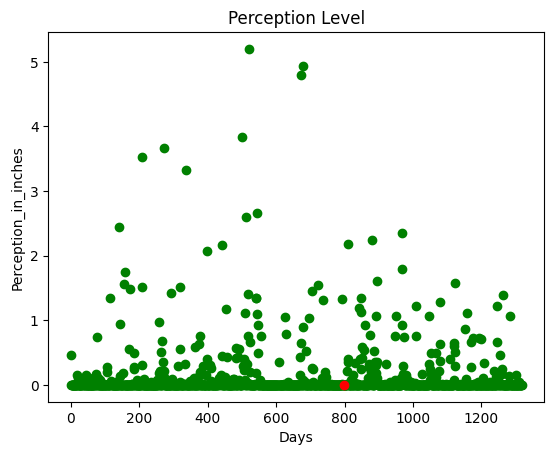

In [82]:
# Visulization
print('the preception Graph')
plt.scatter(days,y ,c='g')
plt.scatter(days[day_index],y[day_index],c='r')
plt.xlabel('Days')
plt.ylabel('Perception_in_inches')
plt.title("Perception Level")
plt.show()

In [83]:
df.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

In [84]:
x_vis=x.filter([ 'TempAvgF',  'DewPointAvgF',
        'HumidityAvgPercent','SeaLevelPressureAvgInches', 
       'VisibilityAvgMiles',  'WindAvgMPH',
       ])

the preception vs Attribute Trend Graph


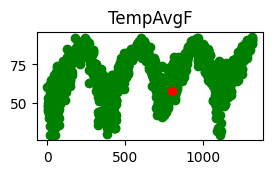

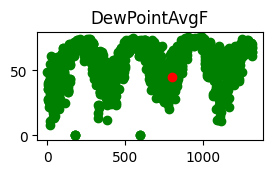

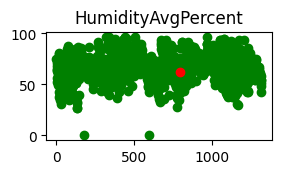

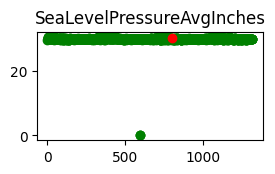

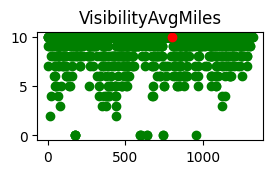

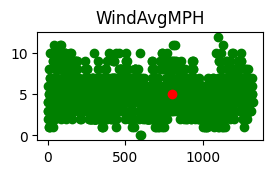

In [85]:
print("the preception vs Attribute Trend Graph")
for x in range( x_vis.columns.size):
    plt.subplot(3,2,x+1)
    plt.scatter(days,x_vis[x_vis.columns.values[x]],c='g') 
    plt.scatter(days[day_index],x_vis[x_vis.columns.values[x]][day_index],c='r')
    plt.title(x_vis.columns[x])
    plt.show()